In [44]:
import pandas as pd

In [45]:
merged_df=pd.read_csv("temp.csv")

In [46]:
merged_df

,Unnamed: 0,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,...,Calories_y,SedentaryMinutes_y,LightlyActiveMinutes_y,FairlyActiveMinutes_y,VeryActiveMinutes_y,SedentaryActiveDistance_y,LightActiveDistance_y,ModeratelyActiveDistance_y,VeryActiveDistance_y,StepTotal
0,0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,...,1985,728,328,13,25,0.00,6.06,0.55,1.88,13162
1,1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,...,1797,776,217,19,21,0.00,4.71,0.69,1.57,10735
2,2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,...,1776,1218,181,11,30,0.00,3.91,0.40,2.44,10460
3,3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,...,1745,726,209,34,29,0.00,2.83,1.26,2.14,9762
4,4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,...,1863,773,221,10,36,0.00,5.04,0.41,2.71,12669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,...,2847,1174,245,4,17,0.00,6.80,0.20,1.08,10686
936,936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,...,3710,1131,217,19,73,0.05,6.24,0.80,11.10,20226
937,937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,...,2832,1187,224,11,18,0.00,6.28,0.46,1.35,10733
938,938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,...,3832,1127,213,12,88,0.00,5.89,0.41,13.22,21420


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_fitness_data(df):
    """
    Preprocesses the fitness dataset by:
    - Dropping unnecessary columns (ID, date)
    - Handling missing values (fills or drops)
    - Standardizing numeric features
    
    Parameters:
        df (DataFrame): Raw fitness dataset
    
    Returns:
        DataFrame: Processed dataset ready for clustering
        Scaler: Trained scaler (to inverse transform if needed)
    """
    # Drop unnecessary columns
    cols_to_drop = ["Unnamed: 0", "Id", "ActivityDay"]
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")
    df = df.drop(columns=[col for col in merged_df.columns if col.endswith('_y')])

    # Rename columns ending with '_x' by removing '_x'
    df = df.rename(columns={col: col.replace('_x', '') for col in df.columns if col.endswith('_x')})

    # Handle missing values (fill with median)
    df.fillna(df.median(), inplace=True)

    # Standardize numeric data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    return df, df_scaled, scaler  # Returning scaler for inverse transformation if needed


In [48]:
df,df_scaled,scaler=preprocess_fitness_data(merged_df)

In [52]:
df_scaled

array([[ 1.0864687 ,  0.76744021,  0.7745189 , ..., -0.87414278,
        -0.44387899,  1.0864687 ],
       [ 0.60913038,  0.37738456,  0.38273324, ..., -0.71473109,
        -0.70579595,  0.60913038],
       [ 0.55504384,  0.31874875,  0.32383736, ...,  0.75318492,
        -0.73505263,  0.55504384],
       ...,
       [ 0.60873702,  0.67821171,  0.68489465, ...,  0.65023154,
         0.73614049,  0.60873702],
       [ 2.71063839,  3.58705762,  3.60664218, ...,  0.45096692,
         2.1293158 ,  2.71063839],
       [ 0.08380255,  0.16068704,  0.1650746 , ..., -0.73465755,
        -0.63335083,  0.08380255]])

In [53]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k=10):
    """
    Determines the optimal number of clusters using the Elbow Method.
    
    Parameters:
        data (array-like): Scaled dataset for clustering.
        max_k (int): Maximum number of clusters to check.
    
    Returns:
        int: Optimal number of clusters.
    """
    inertia = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Find the elbow point (using the second derivative method)
    optimal_k = np.argmax(np.diff(inertia, 2)) + 2  # +2 because diff reduces index

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o', linestyle='--', label='Inertia')
    plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.title("Elbow Method for Optimal k")
    plt.legend()
    plt.show()

    return optimal_k


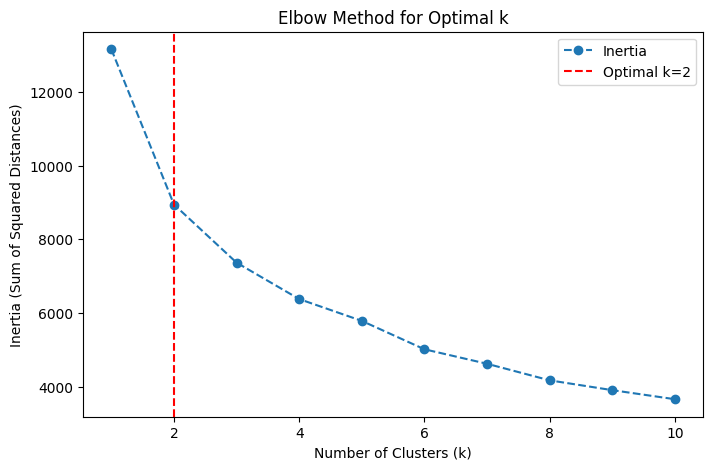

np.int64(2)

In [54]:
find_optimal_clusters(df_scaled)

In [57]:
from sklearn.cluster import KMeans

def apply_kmeans_clustering(df_scaled, k=2):
    """
    Applies K-Means clustering and adds cluster labels to the original dataset.
    
    Parameters:
        df_scaled (array-like): Standardized dataset.
        k (int): Number of clusters.
    
    Returns:
        DataFrame: Original dataset with added cluster labels.
    """
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    
    return cluster_labels, kmeans

# Apply clustering
df["Cluster"], kmeans_model = apply_kmeans_clustering(df_scaled, k=2)


In [58]:
import numpy as np

def find_unimportant_columns(df, cluster_column="Cluster", threshold=0.05):
    """
    Identifies unimportant columns based on low variance across clusters.
    
    Parameters:
        df (DataFrame): Data with cluster labels.
        cluster_column (str): Name of the cluster label column.
        threshold (float): Variance threshold to consider as unimportant.
    
    Returns:
        List: Unimportant columns.
    """
    cluster_means = df.groupby(cluster_column).mean()
    feature_variance = cluster_means.var().sort_values(ascending=True)

    # Identify features with very low variance across clusters
    unimportant_features = feature_variance[feature_variance < threshold].index.tolist()

    return unimportant_features

# Find unimportant columns
unimportant_columns = find_unimportant_columns(df, "Cluster")
print("Unimportant Columns:", unimportant_columns)

# Drop unimportant columns (optional)
df = df.drop(columns=unimportant_columns)


Unimportant Columns: ['SedentaryActiveDistance', 'LoggedActivitiesDistance']


In [61]:
def find_important_columns(df, cluster_column="Cluster", top_n=5):
    """
    Identifies the most important columns based on variance across clusters.
    
    Parameters:
        df (DataFrame): Data with cluster labels.
        cluster_column (str): Name of the cluster column.
        top_n (int): Number of top important columns to return.
    
    Returns:
        List: Top important columns.
    """
    cluster_means = df.groupby(cluster_column).mean()
    feature_variance = cluster_means.var().sort_values(ascending=False)

    # Select top N important features
    important_features = feature_variance.head(top_n).index.tolist()

    return important_features

# Get top 5 important columns
important_columns = find_important_columns(df, "Cluster", top_n=5)
print("Most Important Columns:", important_columns)
# Compute average values for the most important features
important_feature_means = df.groupby("Cluster")[important_columns].mean()
print(important_feature_means)



Most Important Columns: ['TotalSteps', 'StepTotal', 'Calories', 'SedentaryMinutes', 'LightlyActiveMinutes']
           TotalSteps     StepTotal     Calories  SedentaryMinutes  \
Cluster                                                              
0        12049.075829  12049.075829  2736.362559        876.940758   
1         4044.258687   4044.258687  1951.057915       1084.303089   

         LightlyActiveMinutes  
Cluster                        
0                  241.552133  
1                  153.106178  


In [63]:
# Manually label clusters based on key features
def label_clusters(df, cluster_column="Cluster"):
    """
    Assigns meaningful labels to clusters based on feature importance.
    
    Parameters:
        df (DataFrame): Data with cluster labels.
        cluster_column (str): Cluster column name.
    
    Returns:
        Dict: Mapping of cluster numbers to names.
    """
    cluster_means = df.groupby(cluster_column).mean()

    # Analyzing key features
    if "TotalSteps" in cluster_means.columns and "SedentaryMinutes_y" in cluster_means.columns:
        if cluster_means.loc[0, "TotalSteps"] > cluster_means.loc[1, "TotalSteps"]:
            labels = {0: "Active Users", 1: "Sedentary Users"}
        else:
            labels = {0: "Sedentary Users", 1: "Active Users"}
    else:
        labels = {0: "Cluster 0", 1: "Cluster 1"}  # Fallback labels

    return labels

# Assign cluster names
cluster_labels = label_clusters(df)
df["Cluster Label"] = df["Cluster"].map(cluster_labels)

# Display cluster names
print(cluster_labels)


{0: 'Cluster 0', 1: 'Cluster 1'}
